<a href="https://colab.research.google.com/github/Pratyaksha-047/MLnow_2.0/blob/main/univariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/student (1).zip (Unzipped Files)/student-mat.csv', sep=';')

In [4]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


$G3_i = G1_i  \cdot \theta_1 + \theta_0$

In [5]:
uniMathData = df[['G1', 'G3']]
uniMathData.head()

,G1,G3
0,5,6
1,5,6
2,7,10
3,15,15
4,6,10


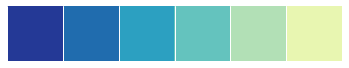

In [10]:
import seaborn as sns
sns.palplot(sns.color_palette('YlGnBu_r'))
pal = sns.color_palette('YlGnBu_r')
pal.as_hex()

import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
sns.set_palette('YlGnBu_r')


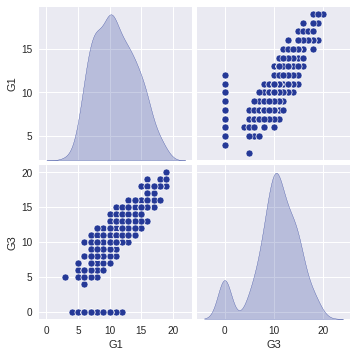

In [13]:
sns.pairplot(df,x_vars = ['G1', 'G3'],y_vars =  ['G1', 'G3'],diag_kind='kde')

In [15]:
trainDataset = uniMathData.sample(frac=0.8, random_state=0) 
testDataset = uniMathData.drop(trainDataset.index)

print(trainDataset.head())
print(testDataset.head())

     G1  G3
329  14  14
318  11  10
317   9   9
65   16  15
59   15  16
    G1  G3
9   14  15
25   6   8
28  11  11
31  17  17
32  17  16


In [16]:
trainFeatures = trainDataset.copy()
testFeatures = testDataset.copy()

In [17]:
trainLabels = trainFeatures.pop('G3')
testLabels = testFeatures.pop('G3')

print(trainLabels.head())
print(testLabels.head())

329    14
318    10
317     9
65     15
59     16
Name: G3, dtype: int64
9     15
25     8
28    11
31    17
32    16
Name: G3, dtype: int64


In [18]:
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

In [19]:
model.compile(loss = 'mean_absolute_error',optimizer = tf.keras.optimizers.Adam(0.001),metrics = ['mae', 'mse'] )

In [20]:
numEpochs = 300
history = model.fit(x = trainFeatures, y = trainLabels, validation_data = (testFeatures, testLabels), epochs = numEpochs)

Epoch 1/300
10/10 [==============================] - 1s 23ms/step - loss: 14.5105 - mae: 14.5105 - mse: 242.2515 - val_loss: 15.2718 - val_mae: 15.2718 - val_mse: 266.2913
Epoch 2/300
10/10 [==============================] - 0s 4ms/step - loss: 14.3931 - mae: 14.3931 - mse: 238.5554 - val_loss: 15.1471 - val_mae: 15.1471 - val_mse: 262.1389
Epoch 3/300
10/10 [==============================] - 0s 5ms/step - loss: 14.2749 - mae: 14.2749 - mse: 234.8462 - val_loss: 15.0226 - val_mae: 15.0226 - val_mse: 258.0288
Epoch 4/300
10/10 [==============================] - 0s 4ms/step - loss: 14.1579 - mae: 14.1579 - mse: 231.2071 - val_loss: 14.8978 - val_mae: 14.8978 - val_mse: 253.9387
Epoch 5/300
10/10 [==============================] - 0s 4ms/step - loss: 14.0401 - mae: 14.0401 - mse: 227.6075 - val_loss: 14.7731 - val_mae: 14.7731 - val_mse: 249.8893
Epoch 6/300
10/10 [==============================] - 0s 4ms/step - loss: 13.9219 - mae: 13.9219 - mse: 223.9211 - val_loss: 14.6490 - val_mae: 1

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


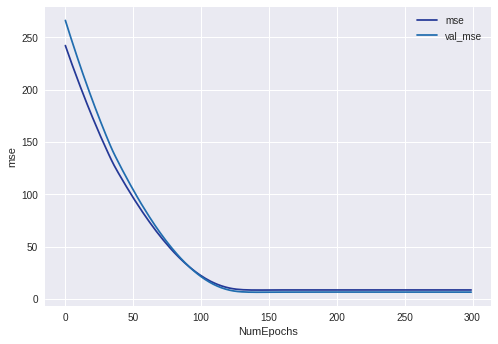

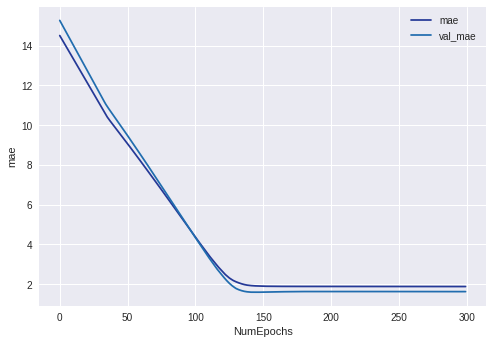

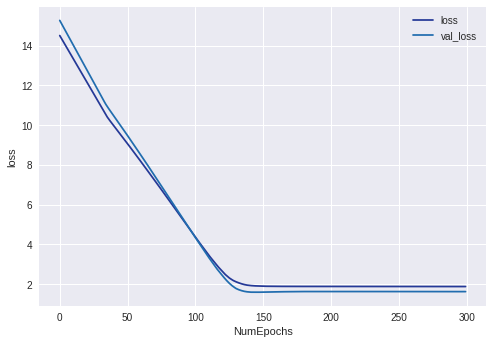

In [22]:
# tempString = 'mse'
def curvePlots(tempString):
  plt.plot(history.history[tempString])
  plt.plot(history.history[f'val_{tempString}'])
  plt.xlabel('NumEpochs')
  plt.ylabel(tempString)
  plt.legend([tempString, f'val_{tempString}'])
  plt.show()


curvePlots('mse')
curvePlots('mae')
curvePlots('loss')

In [23]:
model.predict([1])

array([[2.0153732]], dtype=float32)

In [24]:
print('Prediction for input value 1:',model.predict([1]))
tempListforPreds = [1,2,3,4,5]
print(f'''
input List = {tempListforPreds}
List of Predictions:
{model.predict(tempListforPreds)}
List of Predictions (flattened out):
{model.predict(tempListforPreds).flatten()}
''')

Prediction for input value 1: [[2.0153732]]

input List = [1, 2, 3, 4, 5]
List of Predictions:
[[2.0153732]
 [2.922746 ]
 [3.8301187]
 [4.737491 ]
 [5.6448636]]
List of Predictions (flattened out):
[2.0153732 2.922746  3.8301187 4.737491  5.6448636]



In [25]:
testPreds = model.predict(testFeatures).flatten() 
print(len(testPreds))
print(testPreds)

79
[13.811217   6.5522366 11.089099  16.533335  16.533335  11.996472
 13.811217  18.34808   18.34808    8.3669815 13.811217  12.903845
  8.3669815  7.459609   9.274354  12.903845  11.089099  15.625962
  7.459609  10.181726  14.71859   12.903845  13.811217  15.625962
  7.459609   7.459609   8.3669815 10.181726  11.996472  10.181726
 11.996472  12.903845  10.181726   6.5522366  9.274354  11.996472
  7.459609   8.3669815 13.811217   9.274354   9.274354   7.459609
 11.996472   6.5522366 12.903845   7.459609   7.459609  11.089099
 12.903845  16.533335  11.996472  14.71859    9.274354  11.996472
 14.71859   11.996472  14.71859   11.996472  14.71859   11.089099
 11.996472   8.3669815 15.625962   7.459609  15.625962  11.089099
 15.625962  12.903845   8.3669815  8.3669815 11.996472  17.440708
 12.903845  15.625962  10.181726   7.459609  10.181726   7.459609
 11.089099 ]


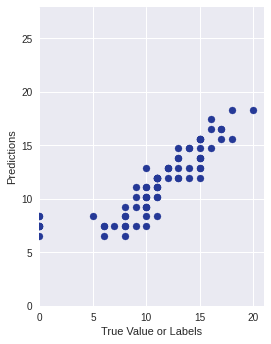

In [27]:
plt.scatter(testLabels, testPreds)
plt.ylabel('Predictions')
plt.xlabel('True Value or Labels')
plt.axis('equal')
plt.axis('square')
plt.xlim([0, plt.xlim()[1]])
plt.ylim([0, plt.ylim()[1]])
plt.show()

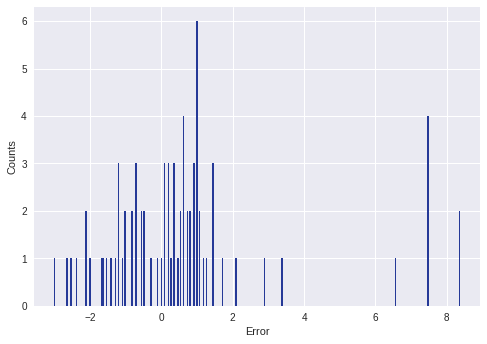

In [29]:
errors = testPreds - testLabels
plt.hist(errors, numEpochs)
plt.xlabel('Error')
plt.ylabel('Counts')
plt.show()